In [1]:
imatlab_export_fig('print-svg')  % Static svg figures.

In [2]:
G = tf(1,conv([1 1],[5 1]));  

In [3]:
H=tf(1,1); 

In [4]:
GH=G*H 


GH =


         1


  ---------------


  5 s^2 + 6 s + 1


Continuous-time transfer function.



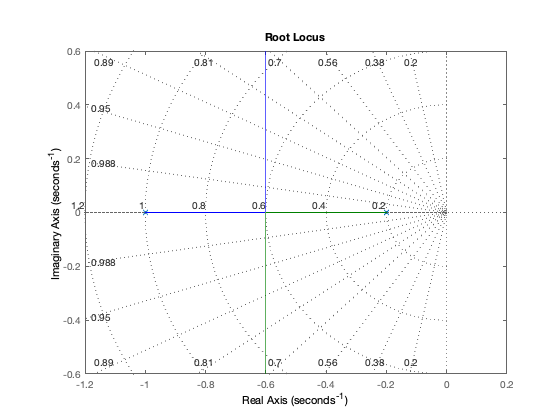

In [5]:
clf, sgrid(1/sqrt(2),0.25:0.25:2), hold on, rlocus(GH),hold off 

In [6]:
zeta = 1/sqrt(2); wn=2;  
s1 = -zeta*wn+j*wn*sqrt(1-zeta^2)  

s1 =
  -1.4142 + 1.4142i


In [7]:
Ki=20; 

In [8]:
m_s1=abs(s1),  p_s1 = angle(s1)*180/pi % degrees  

m_s1 =
     2


p_s1 =
   135


In [9]:
[numGH,denGH] = tfdata(GH,'v');
GHs1=polyval(numGH,s1)/polyval(denGH,s1)   

GHs1 =
  -0.0397 + 0.0610i


In [10]:
mGHs1=abs(GHs1) 

mGHs1 =
    0.0728


In [11]:
pGHs1=-angle(GHs1)*180/pi - 90 % degrees

pGHs1 =
 -213.0264


In [12]:
beta = p_s1*pi/180; psi = pGHs1*pi/180;  % radians

In [13]:
Kprop = (-sin(beta+psi))/(mGHs1*sin(beta)) - (2*Ki*cos(beta)/m_s1)  

Kprop =
   33.1421


In [14]:
Kd = (sin(psi)/(m_s1*mGHs1*sin(beta))) + Ki/(m_s1^2)  

Kd =
   10.2929


In [15]:
D = tf([Kd, Kprop, Ki],[1, 0]) 


D =


  10.29 s^2 + 33.14 s + 20


  ------------------------


             s


Continuous-time transfer function.



In [16]:
Go=D*GH  


Go =


  10.29 s^2 + 33.14 s + 20


  ------------------------


     5 s^3 + 6 s^2 + s


Continuous-time transfer function.



In [17]:
DG = D*G  
Gc = feedback(DG,H)  


DG =


  10.29 s^2 + 33.14 s + 20


  ------------------------


     5 s^3 + 6 s^2 + s


Continuous-time transfer function.




Gc =


      10.29 s^2 + 33.14 s + 20


  --------------------------------


  5 s^3 + 16.29 s^2 + 34.14 s + 20


Continuous-time transfer function.



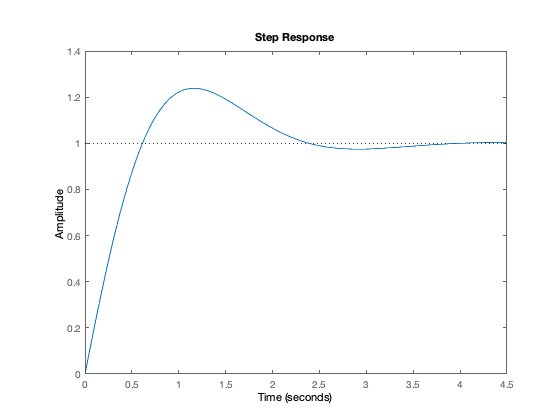

In [18]:
step(Gc) 